# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filePathTrain = '/content/drive/MyDrive/Indic Language Dataset/Guj_train.csv'
df_train = pd.read_csv(filePathTrain)
df_train.head()

,id,Link,Heading,Summary,Article
0,b65e86e963ba642d1c4eb8d0d31c9edc,https://www.divyabhaskar.co.in/local/gujarat/s...,ગેરરીતિ મામલે કાર્યવાહી:મોરબીમાં ઈમ્પેક્ટ ફી વ...,વસુલાતનું સઘળું રેકોર્ડ રજૂ કરવા કર્મચારીઓને ત...,વિશ્વના બીજા નંબરના સૌથી મોટા સિરામીક ઉદ્યોગનુ...
1,656c3c9240508df5e761077b49c2ae3b,https://www.divyabhaskar.co.in/local/gujarat/m...,રજૂઆત:ભાગીને લગ્ન કરતી દીકરી માટે લગ્ન નોંધણીમ...,ચોરાસી કડવા પાટીદાર સમાજની કારોબારીમાં સરકારમા...,ચોરાસી કડવા પાટીદાર સમાજની કારોબારી સભામાં ભાગ...
2,b7e01e0d967b32358e89304a757154f1,https://www.divyabhaskar.co.in/local/gujarat/s...,રજૂઆત:લખતરથી ખેરવા જતી માઇનોર કેનાલ બિસ્માર હા...,અવારનવાર કેનાલ તૂટી જતી હોવાથી ખેતરોમાં પાણી વ...,ધ્રાંગધ્રા- સોખડા ગામ પાસેથી લખતરથી ખેરવા જતી ...
3,b1957ae63894b028fc4b3da17453f694,https://www.divyabhaskar.co.in/local/gujarat/v...,વડોદરામાં નર્સની ફરજ નિષ્ઠા:પતિ સરહદ પર દેશની ...,કારેલીબાગ વિસ્તારની ધનંજય સ્કૂલમાં દીકરીને સાથ...,"જૂન-2020માં કોરોનાની મહામારી પરાકાષ્ઠાએ હતી, ત..."
4,7c248d053dfe28ab92350f2099bca134,https://gujarati.news18.com/news/madhya-gujara...,Ahmedabad crime news: મંદિરના ગેટ આગળ બહાર દાર...,Ahmedabad crime news: સામાન્ય બાબતે ઉગ્ર સ્વરુ...,અમદાવાદઃ સુરતના (surat news) અમરોલીમાં પોલીસ સ...


In [ ]:
df_train = df_train[['Article',  'Heading']]
df_train.head()

,Article,Heading
0,વિશ્વના બીજા નંબરના સૌથી મોટા સિરામીક ઉદ્યોગનુ...,ગેરરીતિ મામલે કાર્યવાહી:મોરબીમાં ઈમ્પેક્ટ ફી વ...
1,ચોરાસી કડવા પાટીદાર સમાજની કારોબારી સભામાં ભાગ...,રજૂઆત:ભાગીને લગ્ન કરતી દીકરી માટે લગ્ન નોંધણીમ...
2,ધ્રાંગધ્રા- સોખડા ગામ પાસેથી લખતરથી ખેરવા જતી ...,રજૂઆત:લખતરથી ખેરવા જતી માઇનોર કેનાલ બિસ્માર હા...
3,"જૂન-2020માં કોરોનાની મહામારી પરાકાષ્ઠાએ હતી, ત...",વડોદરામાં નર્સની ફરજ નિષ્ઠા:પતિ સરહદ પર દેશની ...
4,અમદાવાદઃ સુરતના (surat news) અમરોલીમાં પોલીસ સ...,Ahmedabad crime news: મંદિરના ગેટ આગળ બહાર દાર...


In [ ]:
filePathTest = '/content/drive/MyDrive/Indic Language Dataset/Guj_val_article.csv'
df_test = pd.read_csv(filePathTest)
df_test = df_test[['Article']]
df_test.head()

,Article
0,"હર્મેશ સુખડિયા, અમદાવાદ: શહેરના કુખ્યાત ગુનેગ..."
1,રાજકોટ: ગુજરાતમાં ચૂંટણીનો (Gujarat Election 2...
2,ભારતની અગ્રણી જ્વેલરી બ્રાન્ડ્સમાંની એક રિલાયન...
3,"કિર્તેશ પટેલ, સુરત : છેલ્લા કેટલાક દિવસથી ખ..."
4,vadodara news: શહેરનું આજનું લઘુતમ તાપમાન 16 ડ...


# Cleaning the Data

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', data)

def preprocess_tokenize(text):
    # for removing punctuation from sentences
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)

    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub(r"[‘’।:]", " ", str(text)) #removing other special characters
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    text = remove_emojis(text)
    return text

In [ ]:
df_train_target = df_train['Heading']
df_train_source = df_train['Article']

In [ ]:
tokenized_corpus_target = [preprocess_tokenize(x) for x in df_train_target]  #these are headlines
tokenized_corpus_source = [preprocess_tokenize(x) for x in df_train_source]  #these are articles

In [ ]:
print(tokenized_corpus_target[0])
print(tokenized_corpus_source[0])

ગેરરીતિ મામલે કાર્યવાહી મોરબીમાં ઈમ્પેક્ટ ફી વસૂલાતમાં ગેરરીતિ સામે આવી ત્રણ હંગામી કર્મચારીને છુટા કરાયા
વિશ્વના બીજા નંબરના સૌથી મોટા સિરામીક ઉદ્યોગનુ હબ બનેલા મોરબી શહેરમાં ગેરકાયદેસર બાંધકામો છડેચોક બંધાઈ રહ્યા છે ત્યારે ભુતકાળમાં ઈમ્પેક્ટ ફી મામલે થયેલી ગેરરીતિઓ ઉપરથી પરદો ઉચકવા નવનિયુક્ત ચીફ ઓફિસરે સાત દિવસમાં ઈમ્પેક્ટ ફી વસુલાતનું સઘળું રેકોર્ડ રજૂ કરવા જવાબદાર કર્મચારીઓને તાકીદ કરી હતી છતાં જવાબદાર કર્મચારીઓ દ્વારા રેકર્ડ રજૂ ન કરતા આજે ચીફ ઓફિસર દ્વારા ત્રણ હંગામી ફિક્સ વેતન કર્મચારીઓની સેવાનો અંત લાવી તાત્કાલિક અસરથી છુટા કરવા આદેશ આપ્યા હતા જેને લઈ નગરપાલિકા કચેરીમાં ખળભળાટ મચી ગયો છે આજ રોજ મોરબી પાલિકાના નવનિયુક્ત ચીફ ઓફિસર સંદીપસિંહ ઝાલા દ્વારા નગરપાલિકા વિસ્તારમાં ઈમ્પેક્ટ-ફી અધીનીયમ હેઠળ જે ગેરરીતીઓ હાથ ધરાયેલી હતી તેની તપાસ કરી દિન- સાત માં તેનો અહેવાલ અત્રેની સમક્ષ રજુ કરવાનો હુકમ કરવામાં આવ્યો હતો પરંતુ આ મામલે જવાબદાર એવા ત્રણ કર્મચારીઓ દ્વારા અક્ષમ્ય બેદરકારી દાખવવામાં આવી હતી નગરપાલિકાની શાખ અને સ્વભંડોળને થઇ રહેલા નુકશાન પહોંચાડ્યાનું જણાવી હંગામી ફિક્સ વેતન કર્મ

# Visualizing the Data

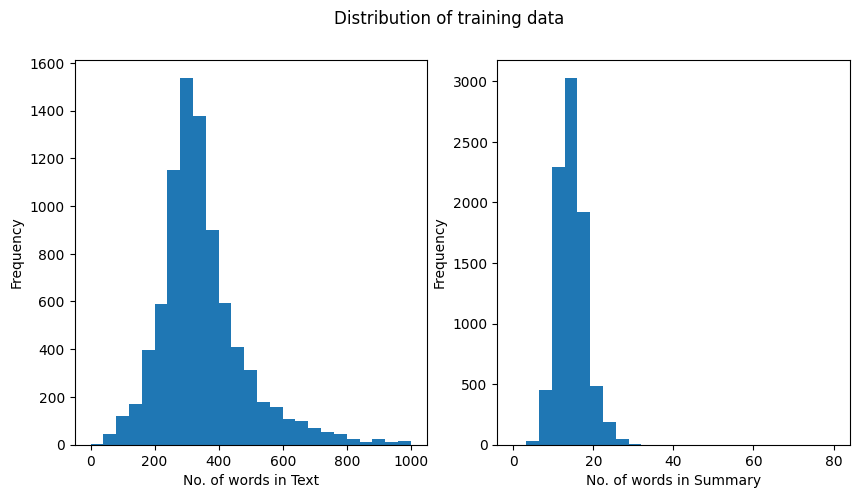

In [ ]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_source[:df_train.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_target[:df_train.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 80])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
fig.suptitle('Distribution of training data')
plt.show()

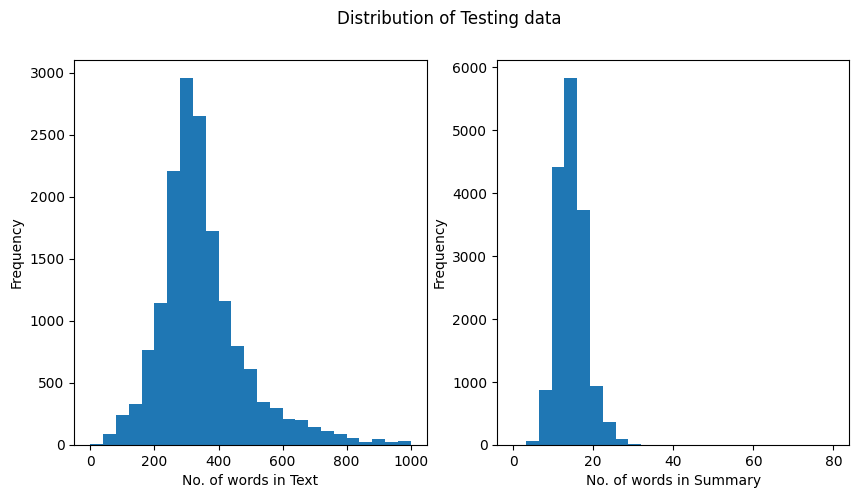

In [ ]:
for i in tokenized_corpus_source[:-df_test.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_target[:-df_test.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 80])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
fig.suptitle('Distribution of Testing data')
plt.show()

In [ ]:
news = df_train
news['Text_Cleaned'] = tokenized_corpus_source
print("::::: Text_Cleaned :::::")
print(news['Text_Cleaned'][0:5], "\n")


news['Summary_Cleaned'] =  tokenized_corpus_target
print("::::: Summary :::::")
print(news['Summary_Cleaned'][0:5], "\n")

corpus = list(news['Text_Cleaned'])

::::: Text_Cleaned :::::
0    વિશ્વના બીજા નંબરના સૌથી મોટા સિરામીક ઉદ્યોગનુ...
1    ચોરાસી કડવા પાટીદાર સમાજની કારોબારી સભામાં ભાગ...
2    ધ્રાંગધ્રા- સોખડા ગામ પાસેથી લખતરથી ખેરવા જતી ...
3    જૂન-માં કોરોનાની મહામારી પરાકાષ્ઠાએ હતી તે સમય...
4    અમદાવાદઃ સુરતના અમરોલીમાં પોલીસ સ્ટેશન વિસ્તાર...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0    ગેરરીતિ મામલે કાર્યવાહી મોરબીમાં ઈમ્પેક્ટ ફી વ...
1    રજૂઆત ભાગીને લગ્ન કરતી દીકરી માટે લગ્ન નોંધણીમ...
2    રજૂઆત લખતરથી ખેરવા જતી માઇનોર કેનાલ બિસ્માર હા...
3    વડોદરામાં નર્સની ફરજ નિષ્ઠા પતિ સરહદ પર દેશની ...
4     મંદિરના ગેટ આગળ બહાર દારૂ પીવાની ના પાડતા યુવ...
Name: Summary_Cleaned, dtype: object 



In [ ]:
text_count = []
summary_count = []

for sent in news['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in news['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [ ]:
graph_df['text'].describe()

count    8457.000000
mean      353.102164
std       152.966258
min        23.000000
25%       268.000000
50%       325.000000
75%       403.000000
max      2540.000000
Name: text, dtype: float64

In [ ]:
graph_df['summary'].describe()

count    8457.000000
mean       14.320208
std         3.593311
min         4.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        32.000000
Name: summary, dtype: float64

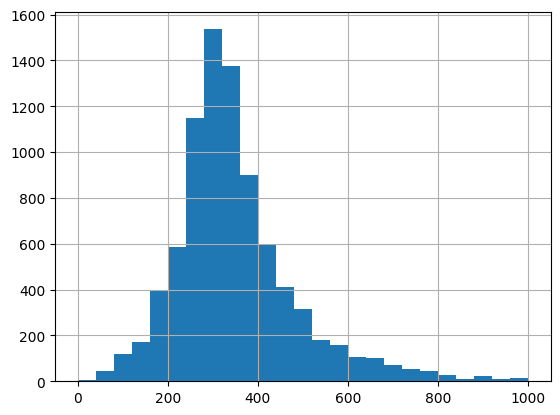

In [ ]:
graph_df['text'].hist(bins = 25, range=(0, 1000))
plt.show()

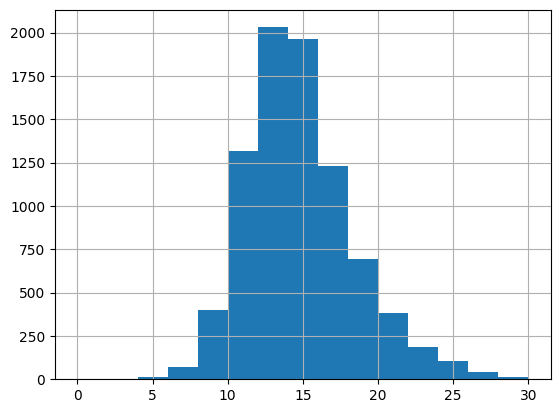

In [ ]:
graph_df['summary'].hist(bins = 15, range=(0, 30))
plt.show()

In [ ]:
max_text_len = 1000
max_summary_len = 30

In [ ]:
cleaned_text = np.array(news['Text_Cleaned'])
cleaned_summary = np.array(news['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len
       and len(cleaned_summary[i].split()) > 1
       and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
    elif((len(cleaned_summary[i].split()) > max_summary_len) or (len(cleaned_text[i].split()) > max_text_len)):
        summ = cleaned_summary[i].split()
        txt = cleaned_text[i].split()
        if(len(summ)>max_summary_len):
          short_summary.append(' '.join(summ[:max_summary_len]))
        else:
          short_summary.append(cleaned_summary[i])
        if(len(txt)>max_text_len):
          short_text.append(' '.join(txt[:max_text_len]))
        else:
          short_text.append(cleaned_text[i])

post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
post_pre['text'] = post_pre['text'].apply(lambda x: 'sostok ' + x + ' eostok')
cleaned_summary = np.array(post_pre['summary'])
cleaned_text = np.array(post_pre['text'])
print("Cleaned Text's size -", cleaned_text.shape[0])
print("Cleaned Summary's size -", cleaned_summary.shape[0])

Cleaned Text's size - 8457
Cleaned Summary's size - 8457


# Tokenization, Padding and Saving Final Input File

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
#Tokenize text to get the vocab count
#prepare a tokenizer for training data
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(list(cleaned_text))

#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer()
summary_tokenizer.fit_on_texts(list(cleaned_summary))

In [ ]:
vocab = text_tokenizer.word_index
import random
def sample_from_dict(d, sample=10):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print(sample_from_dict(vocab))
print("Length of Vocab -", len(vocab))

{'બીમારીવાળા': 64644, 'પીપીઓમાં': 98249, 'બંગ્લા': 92699, 'તરીકે': 196, 'પ્રયાણ': 16267, 'મેમ્બરની': 69155, 'નિવૃતિને': 86418, 'મેઘાણીનગર': 7817, 'નાઈઝિરીયા': 98483, 'એડવર્ટાઇઝમેન્ટ': 47983}
Length of Vocab - 137191


In [ ]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in text_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary in Text:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words in Text:",(freq/tot_freq)*100)

% of rare words in vocabulary in Text: 71.59143092476911
Total Coverage of rare words in Text: 4.567459039074123


In [ ]:
# #prepare a tokenizer for reviews on training data
text_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
text_tokenizer.fit_on_texts(list(cleaned_text))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
text__seq    =   text_tokenizer.texts_to_sequences(cleaned_text)
#padding zero upto maximum length
cleaned_text    =   pad_sequences(text__seq,  maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
text_voc   =  text_tokenizer.num_words + 1

print("Size of vocabulary in Text = {}".format(text_voc))

Size of vocabulary in Text = 38975


In [ ]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in summary_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary in Summary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words in Summary:",(freq/tot_freq)*100)

% of rare words in vocabulary in Summary: 79.5376535296307
Total Coverage of rare words in Summary: 18.873626373626372


In [ ]:
#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
summary_tokenizer.fit_on_texts(list(cleaned_summary))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
summary__seq    =   summary_tokenizer.texts_to_sequences(cleaned_summary)
#padding zero upto maximum length
cleaned_summary    =   pad_sequences(summary__seq,  maxlen=max_summary_len, padding='post')

#size of vocabulary ( +1 for padding token)
summary_voc   =  summary_tokenizer.num_words + 1

print("Size of vocabulary in Summary = {}".format(summary_voc))

Size of vocabulary in Summary = 4949


In [ ]:
summary_tokenizer.word_counts['sostok'], len(cleaned_summary)

(8457, 8457)

In [ ]:
import pickle
pathToFolder = '/content/drive/MyDrive/Languages/Gujarati Language Text Summarization/'
with open(pathToFolder + 'text_tokenizer.pickle', 'wb') as handle:
    pickle.dump(text_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(pathToFolder + 'summary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(summary_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
ind=[]
for i in range(len(cleaned_summary)):
    cnt=0
    for j in cleaned_summary[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

cleaned_text = np.delete(cleaned_text, ind, axis=0)
cleaned_summary = np.delete(cleaned_summary, ind, axis=0)

In [ ]:
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)

cleaned text's size  (8457, 1000)
cleaned summary's size  (8457, 30)


In [ ]:
cleaned_text

array([[   27,  1679,   273, ...,     0,     0,     0],
       [   27,  5325,  1354, ...,     0,     0,     0],
       [   27,  5550,  7581, ...,     0,     0,     0],
       ...,
       [   27, 36350,  1372, ...,     0,     0,     0],
       [   27,  7983,   348, ...,     0,     0,     0],
       [   27,  1320,   949, ...,     0,     0,     0]], dtype=int32)

In [ ]:
cleaned_summary

array([[   1, 2845,  262, ...,    0,    0,    0],
       [   1,  846,  145, ...,    0,    0,    0],
       [   1,  846,  666, ...,    0,    0,    0],
       ...,
       [   1, 1615, 2232, ...,    0,    0,    0],
       [   1,  887, 2443, ...,    0,    0,    0],
       [   1, 3286, 4636, ...,    0,    0,    0]], dtype=int32)

In [ ]:
#Saving Final Input Text
with open(pathToFolder + 'cleaned_text.pickle', 'wb') as file:
    pickle.dump(cleaned_text, file, protocol=pickle.HIGHEST_PROTOCOL)

with open(pathToFolder + 'cleaned_summary.pickle', 'wb') as file:
    pickle.dump(cleaned_summary, file, protocol=pickle.HIGHEST_PROTOCOL)

# Embedding Space

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227138 sha256=9bf877a0aa8196b00f44255a4d95837cfcedcd5d490c11d47def6b2cc742fd09
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
# 'fastText' is a library for learning of word embeddings and text classification created by Facebook's (Meta) AI Research lab.
import fasttext.util

# Link to fastText Models for different Languages: https://fasttext.cc/docs/en/crawl-vectors.html
# !gzip -d /content/drive/MyDrive/fastText/cc.gu.300.bin.gz

In [ ]:
ft = fasttext.load_model('/content/drive/MyDrive/fastText/cc.gu.300.bin')

In [ ]:
word = "ગુજરાતી"
print("Embedding vector shape of", word, " is {}".format(ft.get_word_vector(word).shape[0]))

Embedding vector shape of ગુજરાતી  is 300


# Embedding Matrix

In [ ]:
def create_weight_matrix(model, DICT_SIZE, tokenizer):
  '''
  Accepts word embedding model and the second model, if provided returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector
  '''
  vector_size = model.get_word_vector("ગુજરાતી").shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  unk_words = []
  text_words = []
  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.words:
        w_matrix[index] = model.get_word_vector(word)
        text_words.append(word)
      else:
        w_matrix[index] = np.random.rand(1, vector_size)
        unk_words.append(word)


  print('{} words were considered as they were found in embedding space:'.format(len(text_words)))
  print('{} are some such words'.format(text_words[:10]))
  print()
  print('{} words were randomly alloted as they were not found in embedding space:'.format(len(unk_words)))
  print('{} are some such words'.format(unk_words[:10]))

  return w_matrix

In [ ]:
text_matrix = create_weight_matrix(ft, text_voc, text_tokenizer)

35023 words were considered as they were found in embedding space:
['છે', 'અને', 'આ', 'પણ', 'કે', 'કરી', 'હતી', 'માટે', 'હતો', 'હતા'] are some such words

3951 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'કોરોનાના', 'કોરોનાની', 'કોવિડ', 'કોરોનાથી', 'કોરોનાને', 'કોરોનાનો', 'વેક્સીન', 'કિર્તેશ'] are some such words


In [ ]:
summ_matrix = create_weight_matrix(ft, summary_voc, summary_tokenizer)

4838 words were considered as they were found in embedding space:
['છે', 'અને', 'કોરોના', 'પર', 'કરી', 'કેસ', 'સાથે', 'અમદાવાદ', 'માટે', 'પણ'] are some such words

110 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'કોરોનાના', 'કોરોનાની', 'કોવિડ', 'કોરોનાનો', 'કોરોનાથી', 'કોરોનાને', 'કોરોનામાં', 'વેક્સીન'] are some such words


In [ ]:
with open(pathToFolder + 'text_matrix.pickle', 'wb') as handle:
    pickle.dump(text_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(pathToFolder + 'summ_matrix.pickle', 'wb') as handle:
    pickle.dump(summ_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Modelling

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Wed Apr 17 11:42:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import time
import re
import pickle
import matplotlib.pyplot as plt

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 16

In [ ]:
with open(pathToFolder + 'cleaned_text.pickle', 'rb') as handle:
    cleaned_text = pickle.load(handle)
with open(pathToFolder + 'cleaned_summary.pickle', 'rb') as handle:
    cleaned_summary = pickle.load(handle)

cleaned_text.shape

(8457, 1000)

In [ ]:
x_train, y_train = cleaned_text[:cleaned_text.shape[0]-df_test.shape[0], :], cleaned_summary[:cleaned_summary.shape[0]-df_test.shape[0], :]
x_test, y_test = cleaned_text[:-df_test.shape[0], :], cleaned_summary[:-df_test.shape[0], :]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

# Building the Model

Scalar Dot Product

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

Multi-Head Attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)

        return output, attention_weights

Feed Forwrad Network

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

Single Encoder Layer

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

Single Decoder Layer

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)


    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

Encoder

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_dim = input_vocab_size,
                      output_dim = d_model,
                      input_length = max_len, # max_len of text sequence - 300
                      weights=[emb_matrix],
                      trainable=False) # static weights to be assigned from pretrained embedding
        #self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x

Decoder

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        #self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.embedding = tf.keras.layers.Embedding(input_dim = target_vocab_size,
                      output_dim = d_model,
                      input_length = max_len, # max_len of summ sequence - 16
                      weights=[emb_matrix],
                      trainable=False)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        return x, attention_weights

Transformer Model

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, text_matrix, max_len_text, summ_matrix, max_len_summ, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, text_matrix, max_len_text, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, summ_matrix, max_len_summ, rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

# Training

In [ ]:
with open(pathToFolder + 'text_matrix.pickle', 'rb') as handle:
    text_matrix = pickle.load(handle)
with open(pathToFolder + 'summ_matrix.pickle', 'rb') as handle:
    summ_matrix = pickle.load(handle)

In [ ]:
# hyper-params
num_layers = 4
d_model = text_matrix.shape[1]
dff = 512
num_heads = 10
EPOCHS = 3
max_len_text = 1500
max_len_summ = 30

In [ ]:
encoder_vocab_size = text_voc
decoder_vocab_size = summary_voc

In [ ]:
# Custom Scheduler
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, dtype=tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        self.step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(self.step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

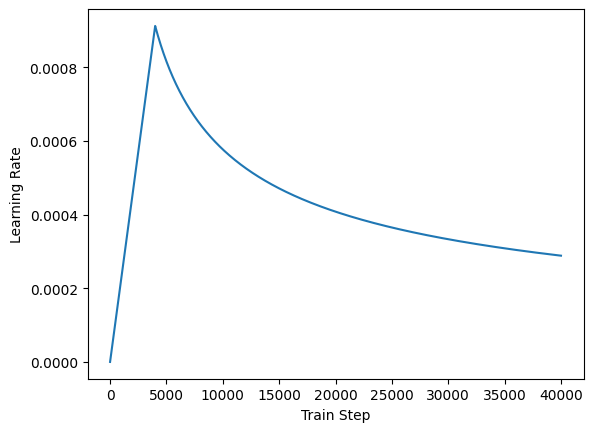

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
# Creating Adam Optimizer with Custom Learning Rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
val_loss = tf.keras.metrics.Mean(name='val_loss')

In [ ]:
transformer = Transformer(
    num_layers,
    d_model,
    num_heads,
    dff,
    encoder_vocab_size,
    decoder_vocab_size,
    pe_input = encoder_vocab_size,
    pe_target = decoder_vocab_size,
    text_matrix = text_matrix,
    max_len_text = max_len_text,
    summ_matrix = summ_matrix,
    max_len_summ = max_len_summ
)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = pathToFolder + "checkpoints"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [ ]:
# Training
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            True,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

In [ ]:
# Validation
@tf.function
def val_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
    val_loss(loss)

In [ ]:
train_loss_values = []
test_loss_values = []
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    val_loss.reset_states()
    #training set - forward prop, loss fn, (gradient descent and optimization) backprop
    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)

        if batch % 2601 == 0:
            print ('Epoch {} ========> Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result().numpy()))

    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    train_loss_values.append(train_loss.result().numpy())

    #test set - forward pass, loss fn (no backward pass)
    for (batch, (inp, tar)) in enumerate(test_dataset):
        val_step(inp, tar)

    test_loss_values.append(val_loss.result().numpy())

    print ('Epoch {}/{} ========> Training Loss {:.4f} Test/Validation Loss {:.4f}'.format(epoch + 1, EPOCHS, train_loss.result().numpy(), val_loss.result().numpy()))

    print ('Time taken for epoch {}: {:.2f} secs\n'.format(epoch+1, time.time() - start))

Epoch 1 ========> Batch 0 Loss 1.7450
Epoch 1/3 ========> Training Loss 0.9488 Test/Validation Loss 0.3684
Time taken for epoch 1: 526.60 secs

Epoch 2 ========> Batch 0 Loss 0.6304
Saving checkpoint for epoch 2 at /content/drive/MyDrive/Languages/Gujarati Language Text Summarization/checkpoints/ckpt-33
Epoch 2/3 ========> Training Loss 0.9065 Test/Validation Loss 0.3596
Time taken for epoch 2: 360.20 secs

Epoch 3 ========> Batch 0 Loss 0.5797
Epoch 3/3 ========> Training Loss 0.8914 Test/Validation Loss 0.3577
Time taken for epoch 3: 358.65 secs



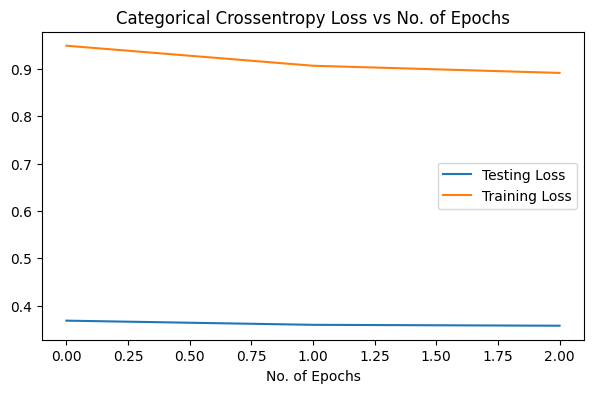

In [ ]:
no_of_epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,1)
fig.set_size_inches(7,4)
ax.plot(no_of_epochs, test_loss_values, label = 'Testing Loss')
ax.plot(no_of_epochs, train_loss_values, label = 'Training Loss')
ax.set_title('Categorical Crossentropy Loss vs No. of Epochs')
ax.legend()
ax.set_xlabel("No. of Epochs")
plt.show()

In [ ]:
with open(pathToFolder + 'text_tokenizer.pickle', 'rb') as handle:
    text_tokenizer = pickle.load(handle)
with open(pathToFolder + 'summary_tokenizer.pickle', 'rb') as handle:
    summary_tokenizer = pickle.load(handle)
max_text_len = 300
max_summary_len = 16

In [ ]:
def predict(input_document):
    # #clean
    #input_document = preprocess_tokenize(input_document)
    input_document = "sostok "+input_document+" eostok"
    #tokenize
    input_document = text_tokenizer.texts_to_sequences([input_document])
    #padding
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=max_text_len, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["sostok"]]
    output = tf.expand_dims(decoder_input, 0)

    for i in range(max_summary_len):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input,
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask,
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["eostok"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def summarize(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = predict(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document

In [ ]:
summarize("અયોધ્યાના રામમંદિરમાં બાલક રામ, એટલે કે રામલલ્લાને બિરાજમાન કરવામાં આવ્યા છે. આ દરમિયાન રામમંદિર માટે બનેલી બીજી અને ત્રીજી મૂર્તિઓ પણ સામે આવી છે. બીજી મૂર્તિ સફેદ મકરાણા આરસની છે, જ્યારે ત્રીજી મૂર્તિ પણ રામલલ્લાની પ્રતિમાના રંગની એટલે કે શ્યામ રંગની છે. ત્રણેયની ઊંચાઈ 51-51 ઈંચ છે.ત્રણેય મૂર્તિમાં ભગવાનને કમળના આસનમાં બિરાજમાન કરવામાં આવ્યા છે. ત્રણેયમાં ભગવાનનું 5 વર્ષનું બાળસ્વરૂપ દર્શાવવામાં આવ્યું છે. રામલલ્લા ઉપરાંત ભગવાન રામની બંને મૂર્તિ રામમંદિરના અલગ-અલગ માળ પર સ્થાપિત કરવામાં આવશે.ટ્રસ્ટે મંદિર માટે ભગવાન રામની 3 મૂર્તિ તૈયાર કરી હતી. એ વિવિધ કારીગરો દ્વારા વિવિધ પથ્થરોમાંથી બનાવવામાં આવી હતી. અંતે, ટ્રસ્ટના સભ્યની સંમતિથી કર્ણાટકના શિલ્પકાર યોગીરાજ દ્વારા બનાવવામાં આવેલી રામલલ્લાની પ્રતિમાને ગર્ભગૃહ માટે પસંદ કરવામાં આવી હતી.જ્યારે બીજી પ્રતિમા દક્ષિણના શિલ્પકાર ગણેશ ભટ્ટે અને ત્રીજી પ્રતિમા રાજસ્થાનના શિલ્પકાર સત્યનારાયણ પાંડેએ બનાવી છે. સત્યનારાયણ પાંડે દ્વારા બનાવવામાં આવેલી પ્રતિમા આરસની બનેલી છે.")

'ગુજરાતના મંદિર અને મંદિર ખાતે'

# Testing

In [ ]:
documents = df_train['Article']
summary = df_train['Heading']

In [ ]:
samples = [17, 35, 69, 21, 26]
docs = []
summ = []
pred = []
for i in samples:
  pred.append(summarize(documents[i]))
  docs.append(' '.join(documents[i].split(' ')[:100]))
  summ.append(summary[i])


result_df = pd.DataFrame({'Input': docs, 'Reference Summary': summ, 'Model Output Summary': pred})
result_df[['Input', 'Reference Summary', 'Model Output Summary']] #17, 69, 21, 26, 35
result_df.style.set_properties(subset=['Input'], **{'width': '400px'})

,Input,Reference Summary,Model Output Summary
0,પકડાયેલા આરોપીઓની તસવીર પરંતુ પોલીસને પાકી બાતમી મળી હોવાથી પારડી પોલીસની ટીમે ટેમ્પોને પોલીસ સ્ટેશન લાવી અને અંદરથી તપાસ કરતા તેમાં એક ચોરખાનું બનાવેલું મળ્યું હતું.. આ ચોર ખાના ને ખોલી ને જોતા પોલીસ પણ ચોંકી ગઈ હતી. કારણ કે ઉપરથી ખાલી દેખાતા ટેમ્પોમાં બનાવેલા ચોર ખાનામાં વિદેશી દારૂની 816 બોટલો મળી આવી હતી.. આથી પોલીસે વિદેશી દારૂ નો જથ્થો અને ટેમ્પો ચાલક અને તેના સાથીદારની ધરપકડ કરી હતી. પોલીસની આ કાર્યવાહીમાં વિદેશી દારૂ અને ટેમ્પો મળી અંદાજે 2.41 લાખ રૂપિયાનો મુદ્દામાલ કબજે કર્યો છે. અને ટેમ્પો ચાલક પ્રવીણ પાટીલ અને તેની સાથે રહેલા કોમલ,"Valsad News: ખાલી ટેમ્પો લઈને પોલીસ પહોંચી સ્ટેશન, તપાસ કરતા નીકળ્યો 816 બોટલ દારૂ, પોલીસ ચોંકી ગઈ",ખાલી ટેમ્પો લઈને પોલીસ પહોંચી સ્ટેશન તપાસ કરતા નીકળ્યો બોટલ દારૂ પોલીસ ચોંકી ગઈ
1,"અમદાવાદ સહિત ગુજરાતમાં કેસમાં ઉત્તરોત્તર વધારો નોંધાઈ રહ્યો છે. ત્યારે 2020માં શરૂ થયેલી કોરોના મહામારી 2022ના આરંભે પણ કહેર વર્તાવી રહી છે. નવા વેરિયન્ટ ઓમિક્રોનના કેસની સ્થિતિ આવનારા સમયમાં ગંભીર બનશે એવી આશંકા સિવિલ હોસ્પિટલના સુપરિન્ટેન્ડેન્ટ ડો. રાકેશ જોશીએ દિવ્ય ભાસ્કર સાથેની વાતચીતમાં કરી છે. એવામાં કોરોનાની પહેલી લહેર 2020માં નવેમ્બરમાં હાઈ રહી હતી, તો 2021માં માર્ચ-એપ્રિલમાં પણ હાઈ રહી હતી. આ દરમિયાન 2021ના ડિસેમ્બરમાં અંતમાં અને 2022ની શરૂઆતમાં જાન્યુઆરીમાં ત્રીજી લહેરનાં મંડાણ થયાં છે. કોરોનાના કેસમાં રોજેરોજ નવા રેકોર્ડ બની રહ્યા છે. તેવામાં કોરોનાના નવા કેસ 8 હજારના આંકડાને પણ અમદાવાદમાં વટાવી દે એવી શક્યતા છે.બીજી અને ત્રીજી લહેરનો","ઓમિક્રોનનું સુપરફાસ્ટ સ્પ્રેડિંગ:ત્રીજી લહેરમાં પણ અમદાવાદ જ એપીસેન્ટર, આ ગતિએ તો 5 દિવસમાં જ 5800ના સિંગલ ડે ઓલટાઇમ હાઇનો આંક ક્રોસ થઈ જશે",ત્રીજી લહેરમાં પણ અમદાવાદ જ દિવસમાં જ ના ડે આંક ક્રોસ થઈ જશે
2,"અમદાવાદ : વિશ્વ માનવ અધિકાર દિવસ (World Human Rights Day-2021)અને પવિત્ર દલાઈ લામાને (Dalai Lama)એનાયત કરાયેલા 32માં નોબેલ શાંતિ પુરસ્કાર દિવસ પર રિવરફ્રન્ટ તિબેટિયન સ્વેટર માર્કેટ ( Riverfront Tibetan Sweater Market )ખાતે કાર્યક્રમ યોજાયો હતો. ભારત તિબેટ મૈત્રી સંઘ અને તિબેટિયન સ્વેટર માર્કેટના સંયુક્ત પ્રયાસથી વિશ્વ માનવ અધિકાર દિવસ અને પવિત્ર દલાઈ લામાને એનાયત કરાયેલા 32માં નોબેલ શાંતિ પુરસ્કાર દિવસ પર યોજાયેલા કાર્યક્રમમાં મેયર કિરીટ પરમાર (Mayor Kirit Parmar), એમ જે પુસ્તકાલયના સભ્ય ડો હેમંત ભટ્ટ તેમજ ભારત તિબેટ મૈત્રી સંઘના રાષ્ટ્રીય ઉપાધ્યક્ષ ડો.અમિત જ્યોતિકર ઉપસ્થિત રહ્યા હતા. આ પ્રસંગે મેયર કિરીટ પરમારે તિબેટની સંસ્કૃતિ તેમજ ભારત સાથેના સંબંધો વિશે","Human Rights Day 2021: અમદાવાદ : તિબેટની આઝાદીમાં લેવો જોઈએ ભાગ, જાણો શા માટે",અમદાવાદ આવેલા લેવો આપી તો ચૂંટણી ફોન પર પ્રયાસ કર્યો
3,"રાજકોટ: શહેરમાં (Rajkot) આઘાત પમાડનારી ઘટના સામે આવી છે. શહેરના નીલકંઠ પાર્કમાં રહેતા પરિવારનો 40 દિવસનો દીકરાનું (40 days baby boy death) મોત થયું છે. માતાને શરદી થતા બાળકને ચેપ ન લાગે તે માટે પોતાના પગ પાસે સુવડાવ્યો હતો અન પોતે શરદીની દવા પીને સુઇ ગઇ હતી. જેથી માતાના પગ નીચે ગુંગળાઇને જ વ્હાલસોયા બાળકનનું મોત થયું છે. જોકે, આ વાતની જાણ થતા માતા સહિત પરિવાર આઘાતમાં સરી પડ્યો છે. માતાને શરદી થઇ હતી આ અંગે મળતી વિગતો પ્રમાણે, શહેરના કોઠારિયા રોડ પરના નીલકંઠ પાર્કમાં રવિભાઇ જાનિયાણીનો પરિવાર રહે છે. જ્યાં ગોઝારી ઘટના બની છે. તેમના ઘરે 40 દિવસ પહેલા",રાજકોટ: ઊંઘમાં માતાના પગ નીચે ગૂંગળાઇ જવાથી 40 દિવસના બાળકનું મોત,હૃદયદ્રાવક ઘટના દીકરીનું પગ નીચે જવાથી જવાથી જવાથી જવાથી જવાથી જવાથી જવાથી જવાથી જવાથી જવાથી દિવસના
4,"કિર્તેશ પટેલ, સુરત : સુરતના પાંડેસરા વિસ્તારમાં (Surat) રસ્તા પર માતેલા સાંઢની જેમ ફરતા યમરાજ જેવા પાણીના ટેન્કરે (water tanker) આજે ભેસ્તાન સિદ્ધાર્થનગર નહેર પાસે નોકરી શોધવા નીકળેલા યુવાનનેટેન્કર ચાલકે ટક્કર (collision) મારી અડફેટે લઇ લેતા આ યુવાનને સારવાર માટે હોસ્પિટલ ખાતે ખસેડવામાં આવતા મોત થયું હતું. જોકે આ વિસ્તરમાં છાસવારે બનતા અક્સ્માતન લઈને સ્થળ પર લોકો ભેગા થઇ હોબાળો મચાવ્યો હતો અને આક્રોશ વ્યક્ત કરી ટેન્કર ચાલકની ધોલાઈ કરી હતી. સુરતનો પાંડેસરા વિસ્તાર આમતો ઔદ્યોગિક વિસ્તાર છે .અહીંયા કપડા કલર કરવાની મીલો આવેલી છે અને આ મિલમાં પાણીની જરૂરી હોવાને લઈને આ વિસ્તારમાં અનેક ટેન્કર પાણીનો વેપાર",સુરત : નોકરી શોધવા નીકળેલા યુવાનને મળ્યું મોત! યમદૂત સમાન પાણીના ટેન્કર ટક્કર મારતા જિંદગી ઓલવાઈ,સુરત નોકરી શોધવા નીકળેલા યુવાનને મળ્યું મોત સમાન પાણીના ટેન્કર ટક્કર મારતા જિંદગી


# Evaluation Metrics

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
rouge = Rouge()

summary = result_df['Model Output Summary']
reference = result_df['Reference Summary']

rouge_score = rouge.get_scores(summary,reference)
rouge_score

[{'rouge-1': {'r': 0.6875, 'p': 0.8461538461538461, 'f': 0.7586206847086802},
  'rouge-2': {'r': 0.5, 'p': 0.6153846153846154, 'f': 0.5517241329845423},
  'rouge-l': {'r': 0.6875, 'p': 0.8461538461538461, 'f': 0.7586206847086802}},
 {'rouge-1': {'r': 0.45454545454545453,
   'p': 0.8333333333333334,
   'f': 0.5882352895501731},
  'rouge-2': {'r': 0.3181818181818182,
   'p': 0.5833333333333334,
   'f': 0.4117647013148789},
  'rouge-l': {'r': 0.45454545454545453,
   'p': 0.8333333333333334,
   'f': 0.5882352895501731}},
 {'rouge-1': {'r': 0.14285714285714285, 'p': 0.2, 'f': 0.1666666618055557},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.14285714285714285, 'p': 0.2, 'f': 0.1666666618055557}},
 {'rouge-1': {'r': 0.36363636363636365,
   'p': 0.5714285714285714,
   'f': 0.44444443969135805},
  'rouge-2': {'r': 0.1, 'p': 0.14285714285714285, 'f': 0.11764705397923896},
  'rouge-l': {'r': 0.36363636363636365,
   'p': 0.5714285714285714,
   'f': 0.44444443969135805}},
 {'ro

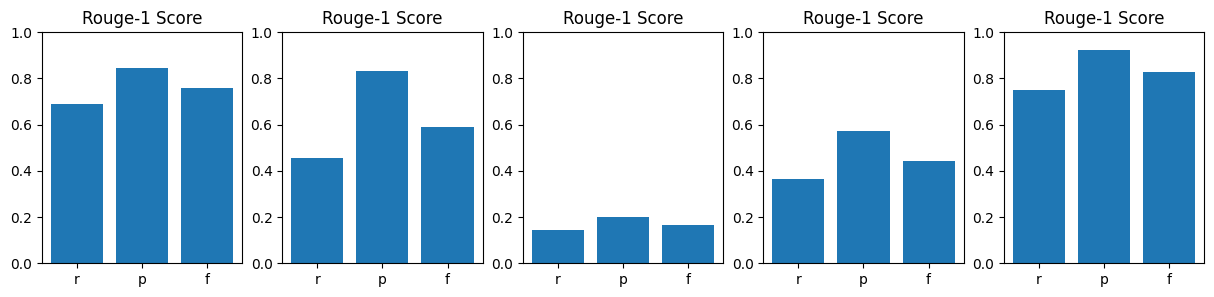

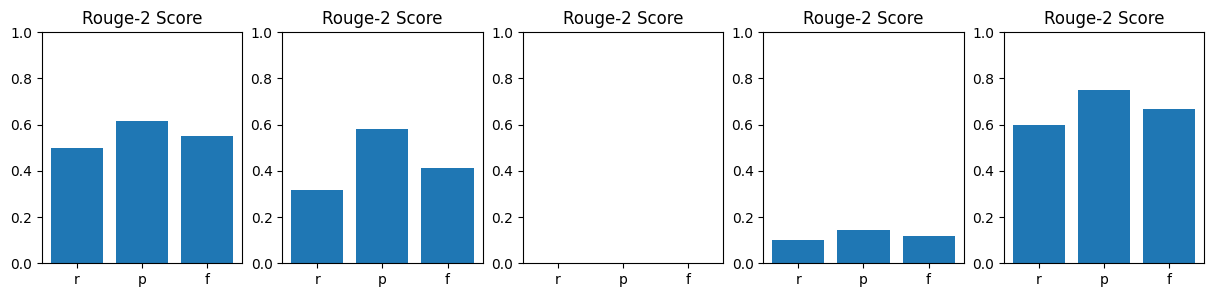

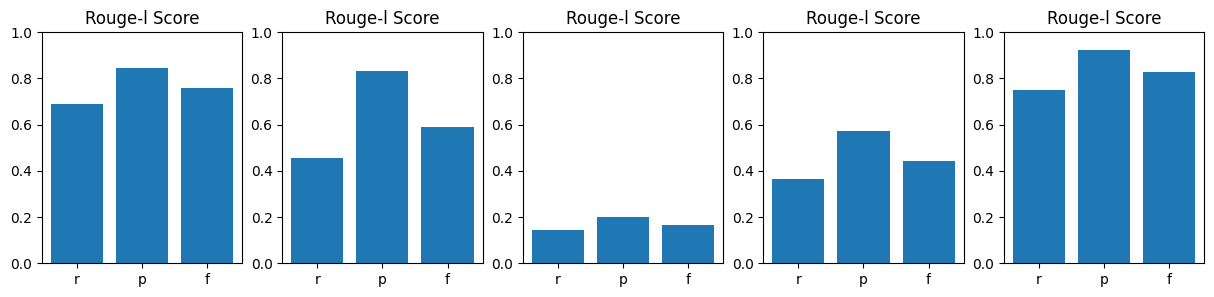

In [ ]:
import matplotlib.pyplot as plt
rouge_1, rouge_2, rouge_l = [], [], []

for r in rouge_score:
  for key, value in r.items():
    if key == 'rouge-1':
      rouge_1.append(value)
    elif key == 'rouge-2':
      rouge_2.append(value)
    elif key == 'rouge-l':
      rouge_l.append(value)

# Plotting the scores
def plotRougeScore(rouge, title):
  fig, ax = plt.subplots(1,5)
  fig.set_size_inches(15,3)
  i=0
  for r1 in rouge:
      ax[i].bar(r1.keys(), r1.values())
      ax[i].set_ylim(0, 1)
      ax[i].set_title(title)
      i+=1
  plt.show()

plotRougeScore(rouge_1, 'Rouge-1 Score')
plotRougeScore(rouge_2, 'Rouge-2 Score')
plotRougeScore(rouge_l, 'Rouge-l Score')

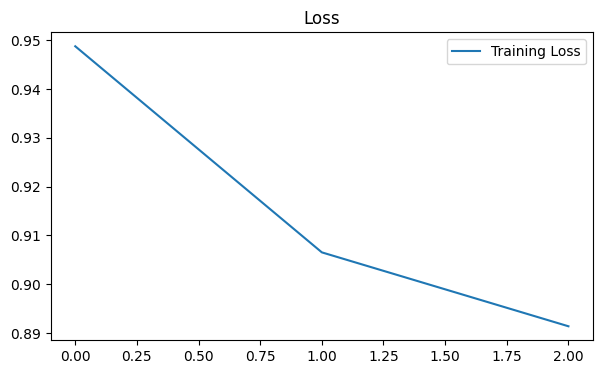

In [ ]:
no_of_epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,1)
fig.set_size_inches(7,4)
ax.plot(no_of_epochs, train_loss_values, label = 'Training Loss')
ax.set_title('Loss')
ax.legend()
# ax.set_xlabel("Epochs")
plt.show()

In [ ]:
from rouge import Rouge
rouge = Rouge()

summary = result_df['Model Output Summary']
reference = result_df['Reference Summary']

rouge_score = rouge.get_scores(summary,reference)
rouge_score

[{'rouge-1': {'r': 0.6875, 'p': 0.8461538461538461, 'f': 0.7586206847086802},
  'rouge-2': {'r': 0.5, 'p': 0.6153846153846154, 'f': 0.5517241329845423},
  'rouge-l': {'r': 0.6875, 'p': 0.8461538461538461, 'f': 0.7586206847086802}},
 {'rouge-1': {'r': 0.45454545454545453,
   'p': 0.8333333333333334,
   'f': 0.5882352895501731},
  'rouge-2': {'r': 0.3181818181818182,
   'p': 0.5833333333333334,
   'f': 0.4117647013148789},
  'rouge-l': {'r': 0.45454545454545453,
   'p': 0.8333333333333334,
   'f': 0.5882352895501731}},
 {'rouge-1': {'r': 0.14285714285714285, 'p': 0.2, 'f': 0.1666666618055557},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 0.14285714285714285, 'p': 0.2, 'f': 0.1666666618055557}},
 {'rouge-1': {'r': 0.36363636363636365,
   'p': 0.5714285714285714,
   'f': 0.44444443969135805},
  'rouge-2': {'r': 0.1, 'p': 0.14285714285714285, 'f': 0.11764705397923896},
  'rouge-l': {'r': 0.36363636363636365,
   'p': 0.5714285714285714,
   'f': 0.44444443969135805}},
 {'ro

In [ ]:
r1 = []
r2 = []
rl = []
for i in rouge_score:
  for key in i:
      # print(f'{key}: {i[key]}')
      if key == 'rouge-1':
        r1.append(i[key])
      elif key == 'rouge-2':
        r2.append(i[key])
      elif key == 'rouge-l':
        rl.append(i[key])

In [ ]:
from statistics import mean

recall = []
precision = []
f1 = []
for j1 in r1:
  for key in j1:
      # print(f'{key}: {j1[key]}')
      if key == 'r':
        recall.append(j1[key])
      elif key == 'p':
        precision.append(j1[key])
      elif key == 'f':
        f1.append(j1[key])

print("Recall Score: " + str(mean(recall)))
print("Precision: " + str(mean(precision)))
print("F1: " + str(mean(f1)))

Recall Score: 0.4797077922077922
Precision: 0.6747985347985348
F1: 0.5571106555411653


# Results

In [ ]:
documents = df_train['Article']
summary = df_train['Heading']
print(documents.shape[0])
print(summary.shape[0])

In [ ]:
docs = []
summ = []
pred = []
for i in range(100):
  pred.append(summarize(documents[i]))
  docs.append(' '.join(documents[i].split(' ')[:100]))
  summ.append(summary[i])

result_df = pd.DataFrame({'Input': docs, 'Reference Summary': summ, 'Model Output Summary': pred})
result_df[['Input', 'Reference Summary', 'Model Output Summary']]
result_df.style.set_properties(subset=['Input'], **{'width': '500px'})

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
rouge = Rouge()

summary = result_df['Model Output Summary']
reference = result_df['Reference Summary']

rouge_score = rouge.get_scores(summary,reference)
rouge_score

In [ ]:
r1 = []
r2 = []
rl = []
for i in rouge_score:
  for key in i:
      # print(f'{key}: {i[key]}')
      if key == 'rouge-1':
        r1.append(i[key])
      elif key == 'rouge-2':
        r2.append(i[key])
      elif key == 'rouge-l':
        rl.append(i[key])

In [ ]:
from statistics import mean

recall = []
precision = []
f1 = []
for j1 in r1:
  for key in j1:
      # print(f'{key}: {j1[key]}')
      if key == 'r':
        recall.append(j1[key])
      elif key == 'p':
        precision.append(j1[key])
      elif key == 'f':
        f1.append(j1[key])

print("Recall Score: " + str(mean(recall)))
print("Precision: " + str(mean(precision)))
print("F1: " + str(mean(f1)))